In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from matplotlib.dates import date2num

In [22]:
#Data Source https://github.com/DigitalBiomarkerDiscoveryPipeline/cgmquantify
df_CGM=pd.read_csv('GlucoseValues.csv')

In [23]:
#Parsing Values from the Row #11 and Columns Names Timestamp (YYYY-MM-DDThh:mm:ss)","Glucose Value (mg/dL)
df_CGM=df_CGM.iloc[11:,:]
df_CGM=df_CGM[["Timestamp (YYYY-MM-DDThh:mm:ss)","Glucose Value (mg/dL)"]]

In [24]:
#Data Type Info
df_CGM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 11 to 2158
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp (YYYY-MM-DDThh:mm:ss)  2148 non-null   object 
 1   Glucose Value (mg/dL)            2148 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.7+ KB


In [25]:
#Change object type for Timestamp (YYYY-MM-DDThh:mm:ss) to datetime format
df_CGM["Timestamp (YYYY-MM-DDThh:mm:ss)"]=pd.to_datetime(df_CGM["Timestamp (YYYY-MM-DDThh:mm:ss)"])

In [26]:
#Change Column Name
df_CGM.rename(columns={"Timestamp (YYYY-MM-DDThh:mm:ss)":"Datetime"},inplace=True)

In [27]:
#Statistic description
df_CGM.describe()

,Glucose Value (mg/dL)
count,2148.000000
mean,111.896648
std,28.799704
min,49.000000
25%,97.000000
50%,105.000000
75%,119.000000
max,261.000000


In [28]:
#Transform to cumulative time using 5-min intervals
df_CGM["time(min)"]=df_CGM["Datetime"].diff().dt.seconds.cumsum().div(60,fill_value=0)

In [29]:
#Set Index
df_CGM.set_index("time(min)",inplace=True)

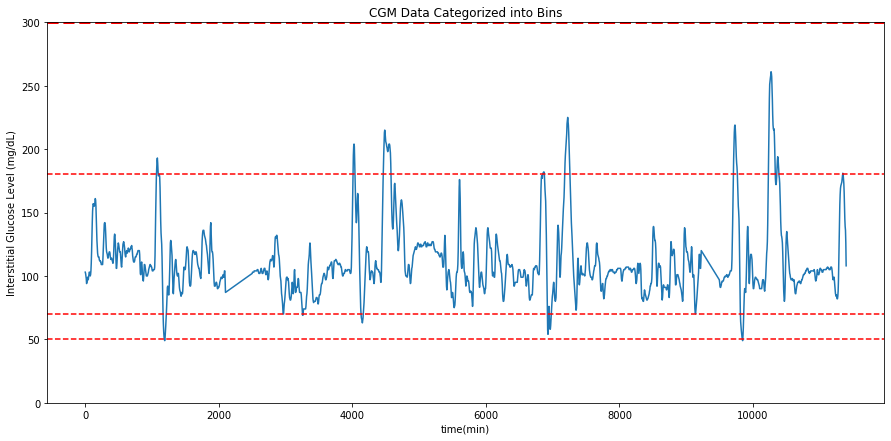

In [30]:
#Time Serie Plot 
fig,ax=plt.subplots(figsize=(15,7))
df_CGM["Glucose Value (mg/dL)"].plot()
ax.set_ylabel("Interstitial Glucose Level (mg/dL)")
ax.set_ylim(0,300)
plt.axhline(y=50,color="r",linestyle="--")
plt.axhline(y=70,color="r",linestyle="--")
plt.axhline(y=180,color="r",linestyle="--")
plt.axhline(y=300,color="r",linestyle="--",linewidth=3)
plt.title("CGM Data Categorized into Bins");

In [31]:
#df_CGM.reset_index(inplace=True)

In [32]:
df_CGM["interval"]=df_CGM["Datetime"].diff().dt.seconds.div(60,fill_value=0)

In [33]:
df_CGM

,Datetime,Glucose Value (mg/dL),interval
time(min),,,
0.000000,2016-10-24 11:24:17,103.0,0.000000
5.000000,2016-10-24 11:29:17,102.0,5.000000
10.000000,2016-10-24 11:34:17,100.0,5.000000
15.000000,2016-10-24 11:39:17,98.0,5.000000
20.000000,2016-10-24 11:44:17,94.0,5.000000
...,...,...,...
11374.766667,2016-11-01 08:59:03,145.0,5.016667
11379.750000,2016-11-01 09:04:02,139.0,4.983333
11384.766667,2016-11-01 09:09:03,136.0,5.016667


In [36]:
#Time Spent within Each Glucose Range (Hypoglycemic<70,InRange)
TotalTime_Minutes=df_CGM["interval"].sum()
TotalTime_hours=df_CGM["interval"].sum()/60
HypoglycemicTimeSpent=100*(df_CGM[(df_CGM['Glucose Value (mg/dL)'] <70)]["interval"].sum())/TotalTime_Minutes
InRangeTimeSpent=100*(df_CGM[(df_CGM['Glucose Value (mg/dL)'] >= 70) & (df_CGM['Glucose Value (mg/dL)'] <= 180)]["interval"].sum())/TotalTime_Minutes
HyperglycemicTimeSpent=100*(df_CGM[(df_CGM['Glucose Value (mg/dL)'] >180)]["interval"].sum())/TotalTime_Minutes

In [37]:
#Dataframe for Time Spent in hypoglycemic, within target range,and hyperglycemic 
df_timespent=(pd.DataFrame({"Value (%)":[HypoglycemicTimeSpent,InRangeTimeSpent,HyperglycemicTimeSpent]},index=["Hypoglycemic Time Spent(<70)","In Range Time Spent(70-180)","Hyperglycemic Time Spent(>180)"])).round(1);df_timespent

,Value (%)
Hypoglycemic Time Spent(<70),1.5
In Range Time Spent(70-180),94.3
Hyperglycemic Time Spent(>180),4.1


In [38]:
#Statistic Description of Glucose 
describe=(pd.DataFrame(df_CGM["Glucose Value (mg/dL)"].describe())).round(1);describe

,Glucose Value (mg/dL)
count,2148.0
mean,111.9
std,28.8
min,49.0
25%,97.0
50%,105.0
75%,119.0
max,261.0
